In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import scipy.fftpack
import scipy as sp
%matplotlib inline
sns.set()
from scipy.stats import norm
pd.options.mode.use_inf_as_na = True

### Importing the file cleaned in the outlier treament. 

In [132]:
df = pd.read_csv('clean.csv',parse_dates=['date'])
df.head()

,Unnamed: 0,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name
0,0,ahmednagar,bajri,2015,April,79.0,1406.0,1538.0,1463.0,2015-04-01,Ahmadnagar
1,1,ahmednagar,bajri,2016,April,106.0,1788.0,1925.0,1875.0,2016-04-01,Ahmadnagar
2,2,ahmednagar,wheat(husked),2015,April,1253.0,1572.0,1890.0,1731.0,2015-04-01,Ahmadnagar
3,3,ahmednagar,wheat(husked),2016,April,387.0,1750.0,2220.0,1999.0,2016-04-01,Ahmadnagar
4,4,ahmednagar,sorgum(jawar),2015,April,3825.0,1600.0,2200.0,1900.0,2015-04-01,Ahmadnagar


In [133]:
df.drop(['Unnamed: 0','district_name'],axis=1,inplace=True)
df.head()


,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date
0,ahmednagar,bajri,2015,April,79.0,1406.0,1538.0,1463.0,2015-04-01
1,ahmednagar,bajri,2016,April,106.0,1788.0,1925.0,1875.0,2016-04-01
2,ahmednagar,wheat(husked),2015,April,1253.0,1572.0,1890.0,1731.0,2015-04-01
3,ahmednagar,wheat(husked),2016,April,387.0,1750.0,2220.0,1999.0,2016-04-01
4,ahmednagar,sorgum(jawar),2015,April,3825.0,1600.0,2200.0,1900.0,2015-04-01


### Attempt is to analyse the news reported in 2015, shown below:
### <img src = 'files/news_price_rise.png'>

In [134]:
onion = df[df['Commodity']=='onion']
onion.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date
31,ahmednagar,onion,2015,April,186700.0,114.0,1459.0,797.0,2015-04-01
32,ahmednagar,onion,2016,April,42342.0,100.0,938.0,538.0,2016-04-01
61,akole,onion,2015,April,105645.0,106.0,1389.0,849.0,2015-04-01
62,akole,onion,2016,April,56372.0,150.0,973.0,662.0,2016-04-01
74,jamkhed,onion,2015,April,5232.0,106.0,1469.0,788.0,2015-04-01


In [135]:
trendline = pd.pivot_table(onion,index='Commodity',columns=['date'],aggfunc='mean')

In [136]:
trendline['modal_price'].head()

date,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,...,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00
Commodity,,,,,,,,,,,,,,,,,,,,,
onion,1357.163934,1384.762712,1305.491228,1361.293103,1165.032258,1296.37931,1129.017857,960.333333,1096.75,1490.153846,...,847.037975,711.730769,663.6875,626.369048,709.666667,716.97561,645.628205,526.60274,600.697368,771.25


###  Generating the trendline pivot table to get monthly trendline for any onion

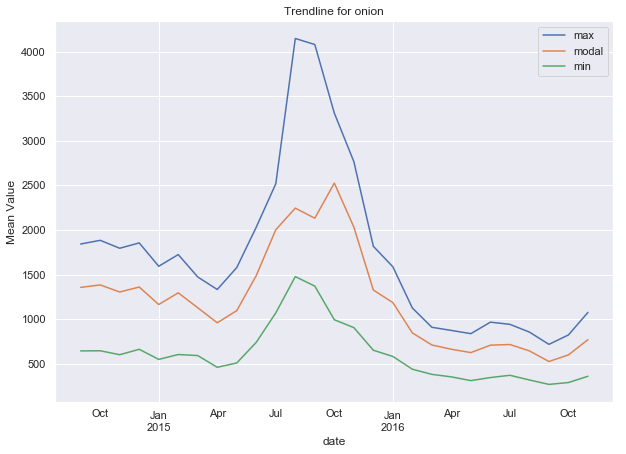

In [137]:
plt.figure(figsize=(10,7))

trendline['max_price'].loc['onion'].plot()
trendline['modal_price'].loc['onion'].plot()
trendline['min_price'].loc['onion'].plot()
plt.title('Trendline for onion')
plt.ylabel('Mean Value')
plt.legend(['max','modal','min','modal_scatter'])



Text(0, 0.5, 'Modal Prices')

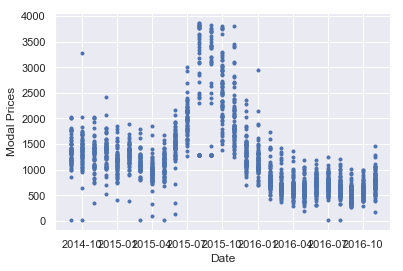

In [138]:
plt.plot(onion['date'],onion['modal_price'],'.')
plt.xlabel('Date')
plt.ylabel('Modal Prices')

### Assuming multiplicative seasonality, dividing the modal_prices with moving average

In [139]:
trends = trendline['modal_price'].loc['onion']
temp_ = pd.DataFrame({'date':trends.index.values,'mean_modal':trends.values})

In [140]:
onion = onion.merge(temp_,on='date')

In [141]:
onion.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,mean_modal
0,ahmednagar,onion,2015,April,186700.0,114.0,1459.0,797.0,2015-04-01,960.333333
1,akole,onion,2015,April,105645.0,106.0,1389.0,849.0,2015-04-01,960.333333
2,jamkhed,onion,2015,April,5232.0,106.0,1469.0,788.0,2015-04-01,960.333333
3,kopargaon,onion,2015,April,34179.0,395.0,1350.0,988.0,2015-04-01,960.333333
4,newasa-ghodegaon,onion,2015,April,186038.0,285.0,1342.0,977.0,2015-04-01,960.333333


In [142]:
onion['residuals']=onion['modal_price']/onion['mean_modal']

Text(0, 0.5, 'Residuals')

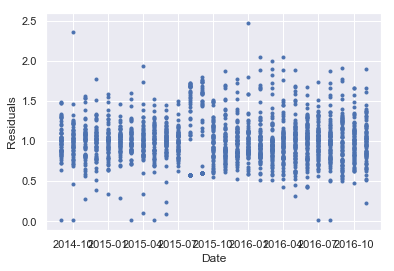

In [143]:
plt.plot(onion['date'],onion['residuals'],'.')
plt.xlabel('Date')
plt.ylabel('Residuals')

### The data was earlier arranged in a sequential manner and therefore, we can use dummy date variable to perform regression.

In [144]:
dummy_dates = np.arange(0,len(trends.index.values))

C:\Users\vipul\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


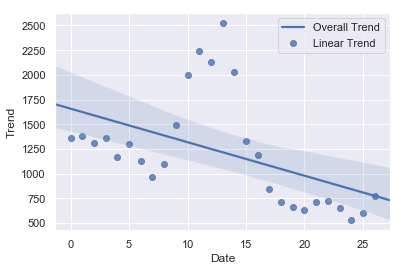

In [145]:
sns.regplot(dummy_dates,trends,'->')
plt.ylabel('Trend')
plt.xlabel('Date')
plt.legend(['Overall Trend','Linear Trend'])

### If the linear trend is removed, then the residuals of the linear regression would correspond to the seasonal effects plus noise or random residuals

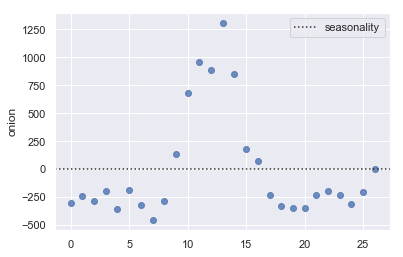

In [146]:
sns.residplot(dummy_dates,trends)
plt.legend(['seasonality'])

In [147]:
def line(x,a,m): return(a+np.multiply(x,m))

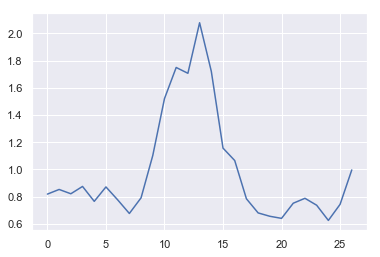

In [148]:
popt,pcov = sp.optimize.curve_fit(line,dummy_dates,trends)
seasonality = trends/line(dummy_dates,*popt)
plt.plot(dummy_dates,seasonality)

In [149]:
def f(x,a,b,mu,sigma):
    return a * np.exp(-(x-mu)**2/(2.0*sigma*sigma))+b
def f2(x,a,b,mu,sigma):
    return a*np.sinc((x-mu)/2.0*sigma)+b

In [150]:
popt,pcov = sp.optimize.curve_fit(f,dummy_dates,seasonality,[2.0,0.8,12,5])

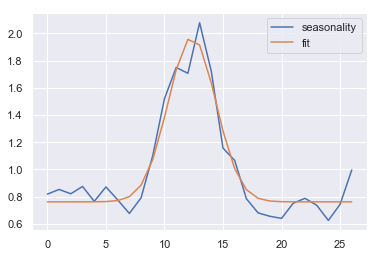

In [151]:
plt.plot(dummy_dates,seasonality)
plt.plot(dummy_dates,f(dummy_dates,*popt))
plt.legend(['seasonality','fit'])